In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
wine=pd.read_csv('wine_data.csv')

wine['quality_label']=wine['quality'].apply(lambda value:'low'
                                           if value<=5 else 'medium'
                                               if value<=7 else 'high')
wine['quality_label']=pd.Categorical(wine['quality_label'],
                                    categories=['low','medium','high'])

wine=wine.sample(frac=1,random_state=42).reset_index(drop=True)

In [8]:
print(wine.shape)
print(wine.info())

(1599, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   residual sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free sulfur dioxide   1599 non-null   float64 
 6   total sulfur dioxide  1598 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1598 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  quality               1598 non-null   float64 
 12  quality_label         1599 non-null   category
dtypes: category(1), float64(12)
memory usage: 151.7 KB
None


In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.52,0.66,9.6,6.0,medium
1,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5,5.0,low
2,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.52,0.98,9.9,6.0,medium
3,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.52,0.54,9.8,5.0,low
4,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.52,0.60,10.6,6.0,medium


In [10]:
subset_attributes=['residual sugar','total sulfur dioxide','sulphates','alcohol','volatile acidity','quality']
we=round(wine[subset_attributes].describe(),2)
print(we)

       residual sugar  total sulfur dioxide  sulphates  alcohol  \
count         1599.00               1598.00    1599.00  1599.00   
mean             2.54                 46.43       0.66    10.42   
std              1.41                 32.88       0.17     1.07   
min              0.90                  6.00       0.33     8.40   
25%              1.90                 22.00       0.55     9.50   
50%              2.20                 38.00       0.62    10.20   
75%              2.60                 62.00       0.73    11.10   
max             15.50                289.00       2.00    14.90   

       volatile acidity  quality  
count           1599.00  1598.00  
mean               0.53     5.64  
std                0.18     0.81  
min                0.12     3.00  
25%                0.39     5.00  
50%                0.52     6.00  
75%                0.64     6.00  
max                1.58     8.00  


In [12]:
subset_attributes=['alcohol','volatile acidity','pH','quality']
ls=round(wine[wine['quality_label']=='low'][subset_attributes].describe(),2)
ms=round(wine[wine['quality_label']=='medium'][subset_attributes].describe(),2)
hs=round(wine[wine['quality_label']=='high'][subset_attributes].describe(),2)
pd.concat([ls,ms,hs],axis=1, keys=['Low Quality Wine','Medium Quality Wine','High Quality Wine'])

Low Quality Wine                                  Medium Quality Wine  \
               alcohol volatile acidity      pH quality             alcohol   
count           743.00           743.00  743.00  743.00              837.00   
mean              9.93             0.59    3.49    4.90               10.83   
std               0.76             0.18    0.10    0.34                1.09   
min               8.40             0.18    2.74    3.00                8.40   
25%               9.40             0.46    3.52    5.00               10.00   
50%               9.70             0.59    3.52    5.00               10.80   
75%              10.30             0.68    3.52    5.00               11.60   
max              14.90             1.58    3.90    5.00               14.00   

                                       High Quality Wine                   \
      volatile acidity      pH quality           alcohol volatile acidity   
count           837.00  836.00  837.00             19.00            19.00   
mean              0.48    3.51    6.24             11.96             0.44   
std               0.16    0.06    0.43              1.33             0.16   
min               0.12    2.93    6.00              9.50             0.26   
25%               0.35    3.52    6.00             11.15             0.34   
50%               0.46    3.52    6.00             11.80             0.38   
75%               0.58    3.52    6.00             12.85             0.52   
max               1.04    3.85    7.00             14.00             0.85   

                      
          pH quality  
count  19.00    18.0  
mean    3.52     8.0  
std     0.02     0.0  
min     3.44     8.0  
25%     3.52     8.0  
50%     3.52     8.0  
75%     3.52     8.0  
max     3.52     8.0

In [19]:
from scipy import stats
 
F, p = stats.f_oneway(wine[wine['quality_label'] == 'low']['alcohol'], 
                      wine[wine['quality_label'] == 'medium']['alcohol'], 
                      wine[wine['quality_label'] == 'high']['alcohol'])
print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

F, p = stats.f_oneway(wine[wine['quality_label'] == 'low']['pH'], 
                      wine[wine['quality_label'] == 'medium']['pH'], 
                      wine[wine['quality_label'] == 'high']['pH'])
print('\nANOVA test for mean pH levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean alcohol levels across wine samples with different quality ratings
F Statistic: 200.94756936150625 	p-value: 1.4562538572175677e-78

ANOVA test for mean pH levels across wine samples with different quality ratings
F Statistic: nan 	p-value: nan


Text(0, 0.5, 'Wine pH')

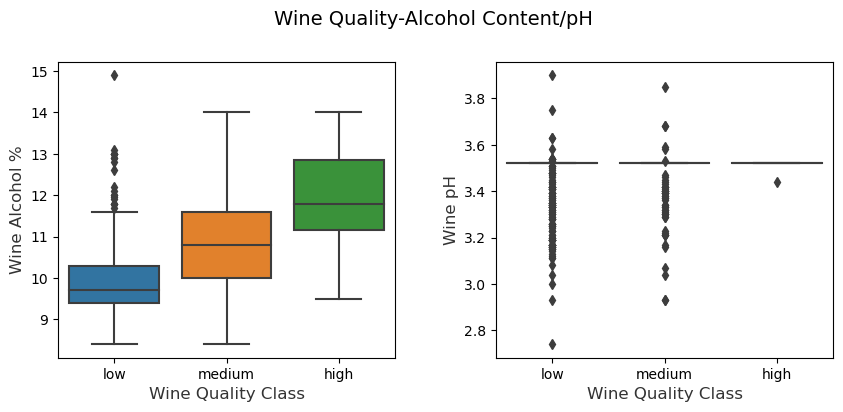

In [25]:
f,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
f.suptitle('Wine Quality-Alcohol Content/pH',fontsize=14)
f.subplots_adjust(top=0.85,wspace=0.3)

sns.boxplot(x="quality_label",y="alcohol",data=wine,ax=ax1)
ax1.set_xlabel("Wine Quality Class",size=12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size=12,alpha=0.8)

sns.boxplot(x="quality_label",y="pH",data=wine,ax=ax2)
ax2.set_xlabel("Wine Quality Class",size=12,alpha=0.8)
ax2.set_ylabel("Wine pH",size=12,alpha=0.8)

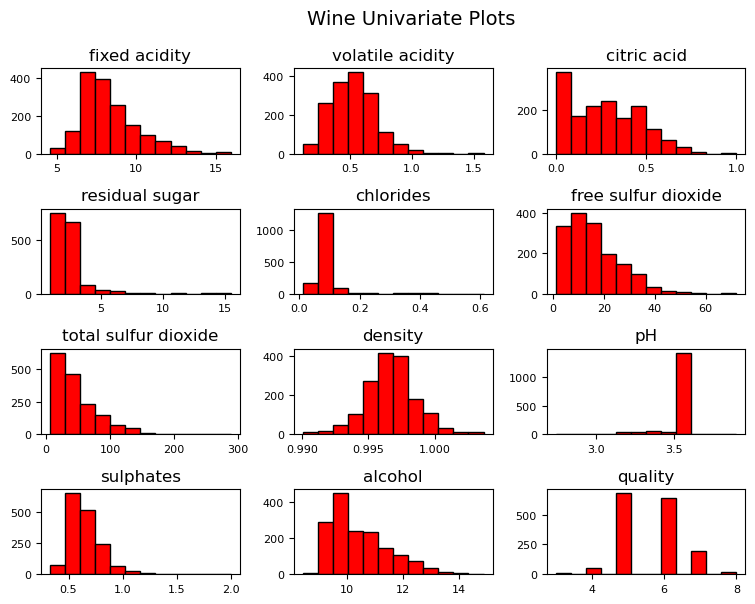

In [26]:
wine.hist(bins=12,color='red',edgecolor='black',linewidth=1.0,
         xlabelsize=8,ylabelsize=8,grid=False)
plt.tight_layout(rect=(0,0,1.2,1.2))
rt=plt.suptitle('Wine Univariate Plots',x=0.65,y=1.25,fontsize=14)


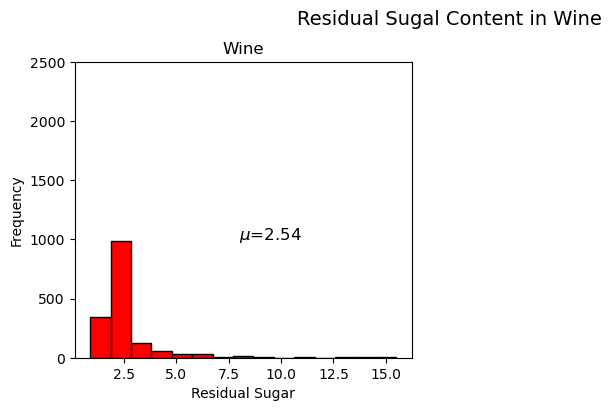

In [27]:
fig=plt.figure(figsize=(10,4))
title=fig.suptitle("Residual Sugal Content in Wine",fontsize=14)
fig.subplots_adjust(top=0.85,wspace=0.3)
ax1=fig.add_subplot(1,2,1)
ax1.set_title("Wine")
ax1.set_xlabel("Residual Sugar")
ax1.set_ylabel("Frequency")
ax1.set_ylim([0,2500])
ax1.text(8,1000, r'$\mu$='+str(round(wine['residual sugar'].mean(),2)),fontsize=12)
w_freq,w_bins,w_patches=ax1.hist(wine['residual sugar'],color='red',bins=15,
                                edgecolor='black',linewidth=1)


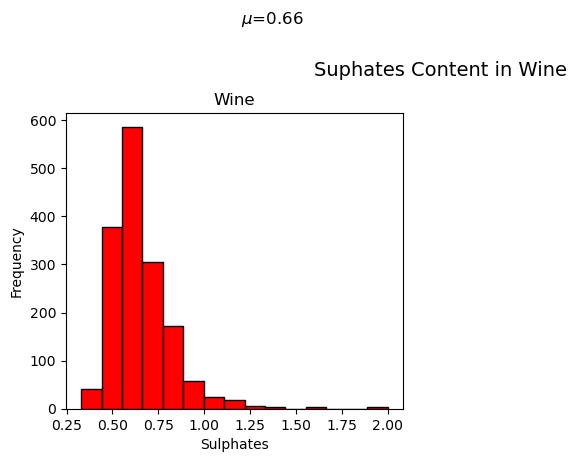

In [29]:
fig=plt.figure(figsize=(10,4))
title=fig.suptitle("Suphates Content in Wine",fontsize=14)
fig.subplots_adjust(top=0.85,wspace=0.3)
ax1=fig.add_subplot(1,2,1)
ax1.set_title("Wine")
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency")
ax1.text(1.2,800, r'$\mu$='+str(round(wine['sulphates'].mean(),2)),
        fontsize=12)
w_freq,w_bins,w_patches=ax1.hist(wine['sulphates'],color='red',bins=15,
                                edgecolor='black',linewidth=1)

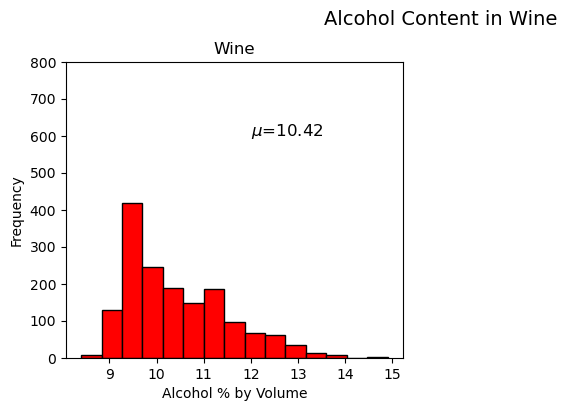

In [30]:
fig=plt.figure(figsize=(10,4))
title=fig.suptitle("Alcohol Content in Wine",fontsize=14)
fig.subplots_adjust(top=0.85,wspace=0.3)
ax1=fig.add_subplot(1,2,1)
ax1.set_title("Wine")
ax1.set_xlabel("Alcohol % by Volume")
ax1.set_ylabel("Frequency")
ax1.set_ylim([0,800])
ax1.text(12,600, r'$\mu$='+str(round(wine['alcohol'].mean(),2)),fontsize=12)

w_freq,w_bins,w_patches=ax1.hist(wine['alcohol'],color='red',bins=15,edgecolor='black',linewidth=1)

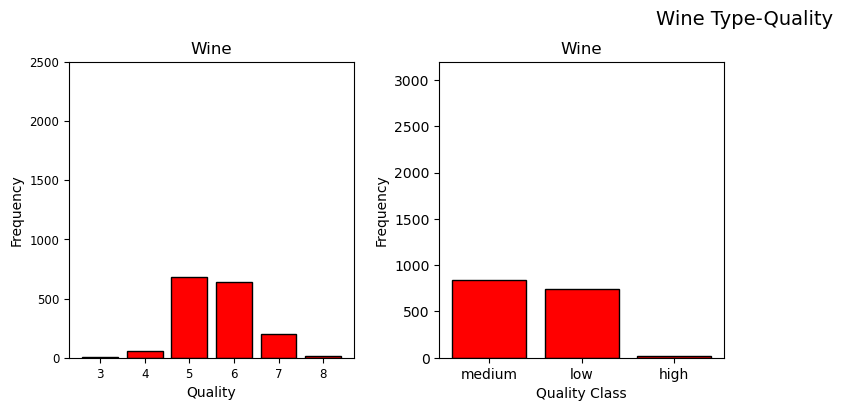

In [39]:
fig=plt.figure(figsize=(18,4))
title=fig.suptitle("Wine Type-Quality",fontsize=14)
fig.subplots_adjust(top=0.85,wspace=0.3)

ax1=fig.add_subplot(1,4,1)
ax1.set_title("Wine")
ax1.set_xlabel("Quality")
ax1.set_ylabel("Frequency")
we_q=wine['quality'].value_counts()
we_q=(list(we_q.index),list(we_q.values))
ax1.set_ylim([0,2500])
ax1.tick_params(axis='both',which='major',labelsize=8.5)
bar1=ax1.bar(we_q[0],we_q[1],color='red',
            edgecolor='black',linewidth=1)

ax2=fig.add_subplot(1,4,2)
ax2.set_title("Wine")
ax2.set_xlabel("Quality Class")
ax2.set_ylabel("Frequency")
we_q=wine['quality_label'].value_counts()
we_q=(list(we_q.index),list(we_q.values))
ax2.set_ylim([0,3200])
bar2=ax2.bar(list(range(len(we_q[0]))),we_q[1],color='red',
            edgecolor='black',linewidth=1,tick_label=we_q[0])

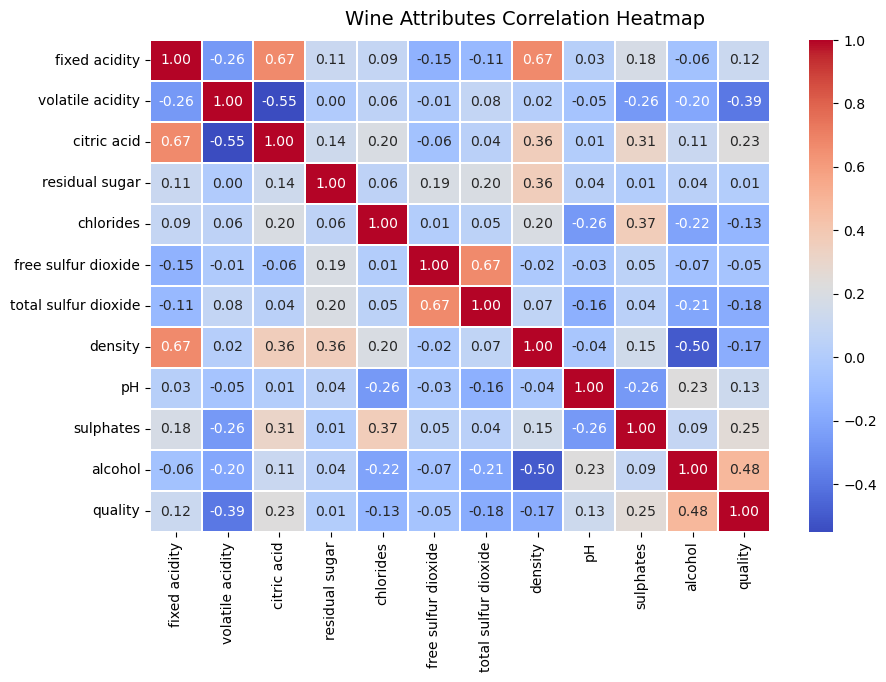

In [41]:
f,ax=plt.subplots(figsize=(10,6))
corr=wine.corr()
hm=sns.heatmap(round(corr,2), annot=True,ax=ax,cmap="coolwarm",fmt='.2f',
              linewidths=.05)
f.subplots_adjust(top=0.93)
t=f.suptitle('Wine Attributes Correlation Heatmap',fontsize=14)

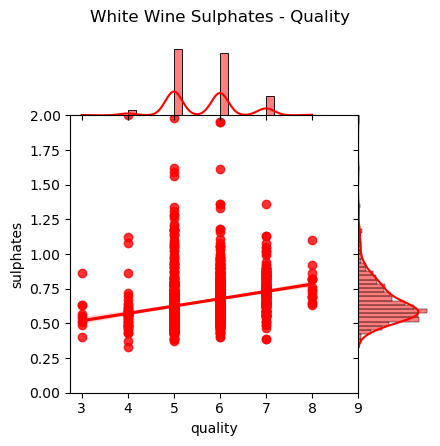

In [44]:
wj = sns.jointplot(x='quality', y='sulphates', data=wine,
                   kind='reg', ylim=(0, 2),
                   color='red', space=0, height=4.5, ratio=4)
wj.ax_joint.set_xticks(list(range(3,10)))
fig = wj.fig 
fig.subplots_adjust(top=0.9)
t = fig.suptitle('White Wine Sulphates - Quality', fontsize=12)